In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.regression.linear_model import OLS

In [2]:
# load data into pandas dataframe
df = pd.concat(pd.read_csv(os.path.join('data', filename), index_col=0) for filename in os.listdir('data'))
df

,popularity,explicit,availability,track_number,release_date,num_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,
6iSanfZLGO9rbZVlA572ux,31,False,77,14,2007-11-01,1,0.589,0.846,11.0,-4.280,0.0,0.0366,0.08010,0.000000,0.1750,0.489,127.958,196667.0,4.0
6fEdWrEYspdneQMNIT33I4,68,True,78,10,2020-02-21,1,0.782,0.670,1.0,-4.332,0.0,0.3580,0.11800,0.000000,0.0956,0.745,172.006,178655.0,4.0
6G1IM8i2JjABsJH3TPygAv,48,False,78,18,2017-01-20,1,0.801,0.803,7.0,-4.350,1.0,0.0486,0.31300,0.000000,0.1210,0.665,119.928,169027.0,5.0
3px2rAPu74ltbkf9eZsZ8h,70,False,78,4,2016-01-15,1,0.562,0.904,1.0,-4.947,1.0,0.0807,0.00302,0.000000,0.0433,0.651,94.481,158667.0,4.0
2FecJKgl4u9OHiH0ERkyQT,26,False,76,17,2019-11-22,1,0.654,0.884,9.0,-5.466,1.0,0.2020,0.15100,0.000268,0.3790,0.851,124.072,190973.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1kHEuJRasudLhjvnbfc4yS,67,False,79,4,2014-10-26,1,0.760,0.703,5.0,-5.412,1.0,0.0540,0.10300,0.000000,0.0913,0.570,95.997,231827.0,4.0
1Aw0wPIW70GsV9KoD8m7Ps,42,False,76,7,2015-05-18,1,0.583,0.860,8.0,-4.347,1.0,0.0842,0.02310,0.000001,0.0977,0.279,127.032,221533.0,4.0
3l9eJDpanLvBIPhw6F8oIb,38,False,79,9,2016-03-25,2,0.452,0.613,1.0,-6.142,1.0,0.3080,0.07820,0.000007,0.0690,0.196,164.863,284772.0,5.0


In [3]:
# change data type on a couple of variables
df['explicit'] = df['explicit'].astype('int')
df['release_date'] = pd.to_datetime(df['release_date'], yearfirst=True)

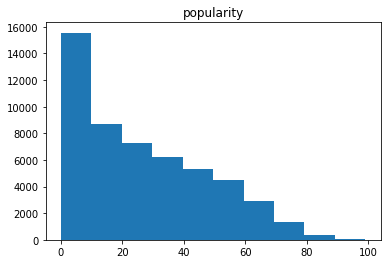

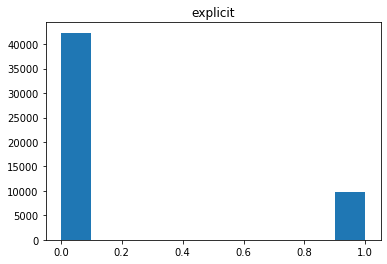

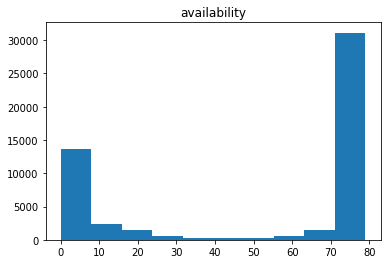

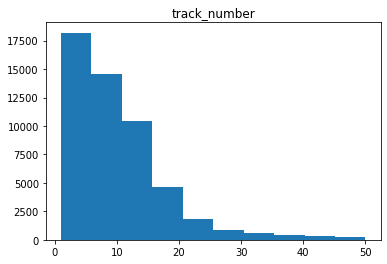

/home/mckay/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


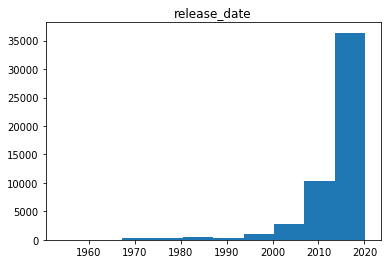

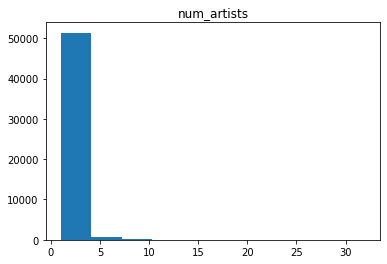

/home/mckay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mckay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


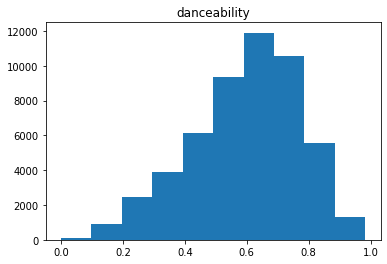

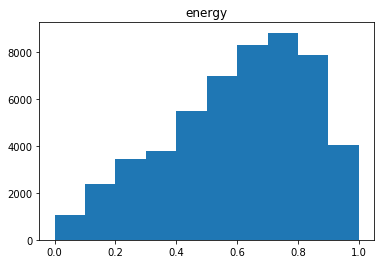

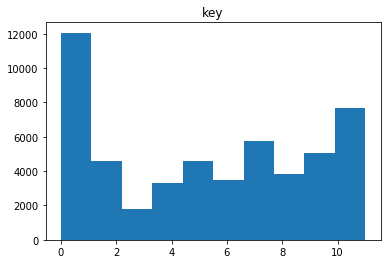

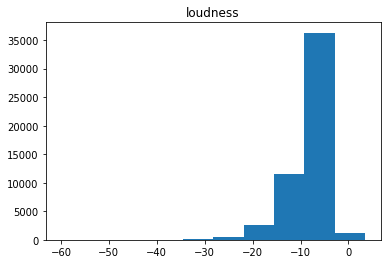

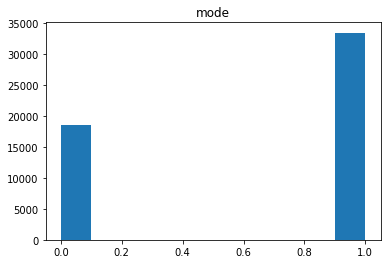

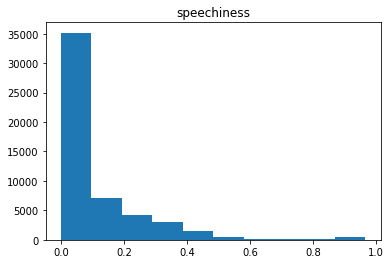

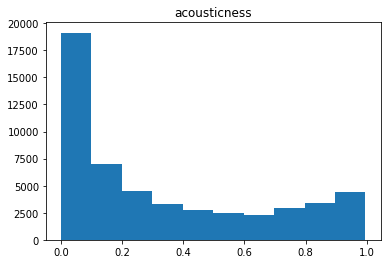

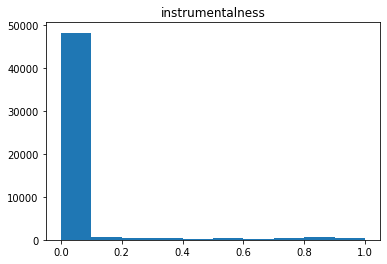

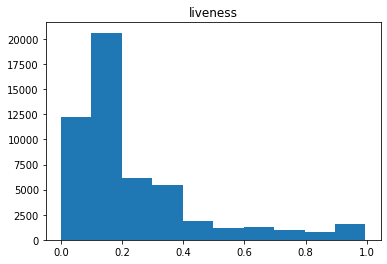

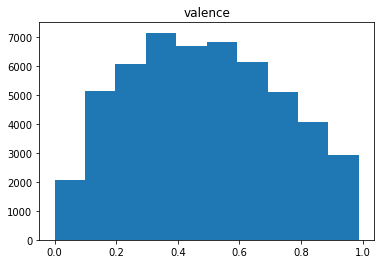

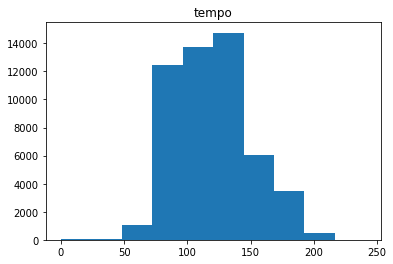

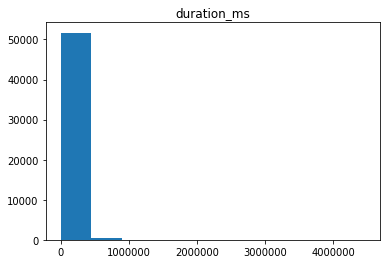

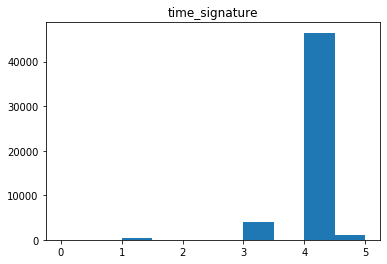

In [4]:
# look at distributions of values
for column in df.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

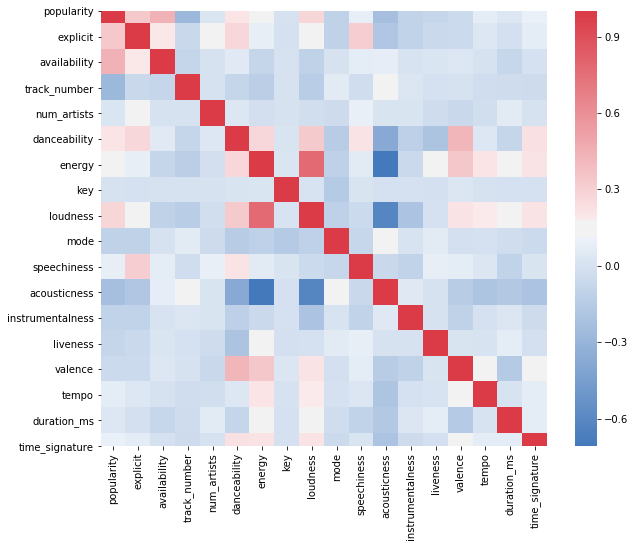

In [5]:
# look at correlations
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(250, 10, as_cmap=True))
plt.show()

In [6]:
# Calculate naive regression
reg1 = OLS.from_formula('popularity ~ explicit + availability + track_number + num_artists + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + time_signature', data=df)
fitted1 = reg1.fit(cov_type='HC1')  # robust
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     2599.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:37:04   Log-Likelihood:            -2.2012e+05
No. Observations:               52147   AIC:                         4.403e+05
Df Residuals:                   52130   BIC:                         4.404e+05
Df Model:                          16                                         
Covariance Type:                  HC1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           31.8708      0.991     32.173      0.000      29.929      33.812
explicit             9.0745      0.229     39.570      0.000       8.625       9.524
availability         0.2683      0.002    129.345      0.000       0.264       0.272
track_number        -0.4885      0.008    -61.323      0.000      -0.504      -0.473
num_artists         -0.0166      0.076     -0.220      0.826      -0.165       0.132
danceability         8.1502      0.548     14.867      0.000       7.076       9.225
energy              -8.9180      0.658    -13.548      0.000     -10.208      -7.628
loudness             1.5033      0.033     45.635      0.000       1.439       1.568
mode                -1.5121      0.156     -9.710      0.000      -1.817      -1.207
speechiness          0.4175      0.542      0.770      0.441      -0.645       1.480
acousticness        -5.4875      0.348    -15.776      0.000      -6.169      -4.806
instrumentalness    -4.2454      0.406    -10.468      0.000      -5.040      -3.451
liveness            -4.2423      0.333    -12.729      0.000      -4.896      -3.589
valence            -11.8505      0.378    -31.386      0.000     -12.590     -11.110
tempo                0.0128      0.003      5.128      0.000       0.008       0.018
duration_ms       2.812e-06   1.12e-06      2.505      0.012    6.12e-07    5.01e-06
time_signature       0.8975      0.164      5.476      0.000       0.576       1.219
==============================================================================
Omnibus:                     1151.448   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.860
Skew:                           0.376   Prob(JB):                    1.43e-267
Kurtosis:                       2.962   Cond. No.                     3.56e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Modify some variables so they make more sense in regression context

# is 4:4?
df['time_signature_4'] = (df['time_signature'] == 4).astype('int')
# difference between data collection date and release date
df['days_since_release'] = (pd.to_datetime('2020-03-11') - df['release_date']).apply(lambda x: x.days)

In [8]:
# Calculate new regression
reg2 = OLS.from_formula('popularity ~ explicit + availability + track_number + days_since_release + num_artists + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + time_signature_4', data=df)
fitted2 = reg2.fit(cov_type='HC1')  # robust
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2495.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:37:04   Log-Likelihood:            -2.1979e+05
No. Observations:               52147   AIC:                         4.396e+05
Df Residuals:                   52129   BIC:                         4.398e+05
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.4836      0.852     40.487      0.000      32.814      36.153
explicit               8.7054      0.228     38.236      0.000       8.259       9.152
availability           0.2708      0.002    130.181      0.000       0.267       0.275
track_number          -0.5215      0.008    -64.808      0.000      -0.537      -0.506
days_since_release    -0.0007   2.62e-05    -26.495      0.000      -0.001      -0.001
num_artists           -0.2773      0.076     -3.672      0.000      -0.425      -0.129
danceability           6.4398      0.556     11.581      0.000       5.350       7.530
energy                -7.4502      0.654    -11.400      0.000      -8.731      -6.169
loudness               1.3698      0.033     41.853      0.000       1.306       1.434
mode                  -1.3543      0.155     -8.759      0.000      -1.657      -1.051
speechiness           -0.4989      0.544     -0.917      0.359      -1.565       0.567
acousticness          -5.5138      0.346    -15.931      0.000      -6.192      -4.835
instrumentalness      -4.4447      0.405    -10.973      0.000      -5.239      -3.651
liveness              -4.0798      0.332    -12.292      0.000      -4.730      -3.429
valence              -10.5666      0.382    -27.686      0.000     -11.315      -9.819
tempo                  0.0120      0.002      4.826      0.000       0.007       0.017
duration_ms         6.063e-06   1.39e-06      4.372      0.000    3.35e-06    8.78e-06
time_signature_4       1.0191      0.242      4.220      0.000       0.546       1.493
==============================================================================
Omnibus:                     1063.400   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1129.338
Skew:                           0.360   Prob(JB):                    5.85e-246
Kurtosis:                       2.966   Cond. No.                     3.25e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Remove availability
reg3 = OLS.from_formula('popularity ~ explicit + track_number + days_since_release + num_artists + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + time_signature_4', data=df)
fitted3 = reg3.fit(cov_type='HC1')  # robust
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1328.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:37:05   Log-Likelihood:            -2.2663e+05
No. Observations:               52147   AIC:                         4.533e+05
Df Residuals:                   52130   BIC:                         4.535e+05
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.3990      0.924     46.961      0.000      41.588      45.210
explicit              14.1402      0.250     56.514      0.000      13.650      14.631
track_number          -0.6259      0.009    -68.942      0.000      -0.644      -0.608
days_since_release    -0.0005   2.86e-05    -19.211      0.000      -0.001      -0.000
num_artists           -0.4294      0.086     -4.980      0.000      -0.598      -0.260
danceability           8.8369      0.629     14.052      0.000       7.604      10.069
energy                -7.8424      0.726    -10.804      0.000      -9.265      -6.420
loudness               1.1249      0.034     32.933      0.000       1.058       1.192
mode                  -1.2578      0.177     -7.089      0.000      -1.606      -0.910
speechiness           -1.8479      0.597     -3.096      0.002      -3.018      -0.678
acousticness          -3.3668      0.389     -8.666      0.000      -4.128      -2.605
instrumentalness      -3.3283      0.437     -7.616      0.000      -4.185      -2.472
liveness              -2.1446      0.388     -5.527      0.000      -2.905      -1.384
valence               -8.4889      0.430    -19.751      0.000      -9.331      -7.647
tempo                  0.0187      0.003      6.684      0.000       0.013       0.024
duration_ms         1.292e-06   1.18e-06      1.097      0.273   -1.02e-06     3.6e-06
time_signature_4       0.9147      0.263      3.478      0.001       0.399       1.430
==============================================================================
Omnibus:                     1362.623   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1366.349
Skew:                           0.369   Prob(JB):                    2.00e-297
Kurtosis:                       2.710   Cond. No.                     3.25e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 3.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Add squared release date term
# This makes statsmodels complain because the squared and non-squared terms are so correlated, but I think it's ok, and I don't want to use orthogonal polynomials
reg4 = OLS.from_formula('popularity ~ availability + explicit + track_number + days_since_release + I(days_since_release**2) + num_artists + danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + time_signature_4', data=df)
fitted4 = reg4.fit(cov_type='HC1')  # robust
fitted4.summary()

/home/mckay/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2524.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:37:05   Log-Likelihood:            -2.1955e+05
No. Observations:               52147   AIC:                         4.391e+05
Df Residuals:                   52128   BIC:                         4.393e+05
Df Model:                          18                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     36.6514      0.867     42.278      0.000      34.952      38.350
availability                   0.2677      0.002    129.106      0.000       0.264       0.272
explicit                       8.5629      0.226     37.852      0.000       8.120       9.006
track_number                  -0.5361      0.008    -66.336      0.000      -0.552      -0.520
days_since_release            -0.0019   6.14e-05    -30.486      0.000      -0.002      -0.002
I(days_since_release ** 2)  8.591e-08   4.29e-09     20.030      0.000    7.75e-08    9.43e-08
num_artists                   -0.4116      0.075     -5.475      0.000      -0.559      -0.264
danceability                   5.2222      0.556      9.386      0.000       4.132       6.313
energy                        -7.1320      0.649    -10.982      0.000      -8.405      -5.859
loudness                       1.3638      0.032     42.104      0.000       1.300       1.427
mode                          -1.2636      0.154     -8.206      0.000      -1.565      -0.962
speechiness                   -0.2727      0.542     -0.503      0.615      -1.336       0.790
acousticness                  -5.6694      0.345    -16.451      0.000      -6.345      -4.994
instrumentalness              -4.6182      0.404    -11.422      0.000      -5.411      -3.826
liveness                      -3.6279      0.331    -10.953      0.000      -4.277      -2.979
valence                      -10.3824      0.381    -27.237      0.000     -11.130      -9.635
tempo                          0.0102      0.002      4.129      0.000       0.005       0.015
duration_ms                 7.382e-06   1.49e-06      4.955      0.000    4.46e-06    1.03e-05
time_signature_4               1.0261      0.241      4.266      0.000       0.555       1.498
==============================================================================
Omnibus:                      979.858   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.736
Skew:                           0.345   Prob(JB):                    1.24e-225
Kurtosis:                       2.968   Cond. No.                     6.50e+08
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Now for Bayesian regression

%load_ext autoreload
%autoreload 2
from mcmc import gibbs_sampler

In [12]:
y = df.dropna()['popularity'].values
features = ['availability', 'explicit', 'track_number', 'days_since_release', 'num_artists', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature_4']
X = df.dropna()[features].values

In [13]:
burnin = 3000
betas, sigma = gibbs_sampler(X, y, np.zeros(X.shape[1]), 1, np.diag(np.ones(X.shape[1])), 1, 1, burnin, 20000)

Sampling 1000 / 23000
Sampling 2000 / 23000
Sampling 3000 / 23000
Sampling 4000 / 23000
Sampling 5000 / 23000
Sampling 6000 / 23000
Sampling 7000 / 23000
Sampling 8000 / 23000
Sampling 9000 / 23000
Sampling 10000 / 23000
Sampling 11000 / 23000
Sampling 12000 / 23000
Sampling 13000 / 23000
Sampling 14000 / 23000
Sampling 15000 / 23000
Sampling 16000 / 23000
Sampling 17000 / 23000
Sampling 18000 / 23000
Sampling 19000 / 23000
Sampling 20000 / 23000
Sampling 21000 / 23000
Sampling 22000 / 23000


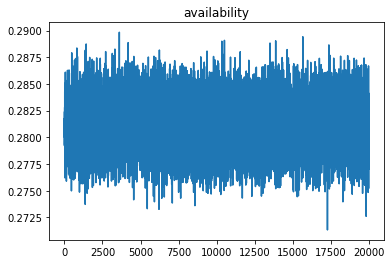

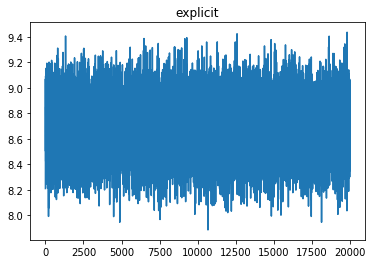

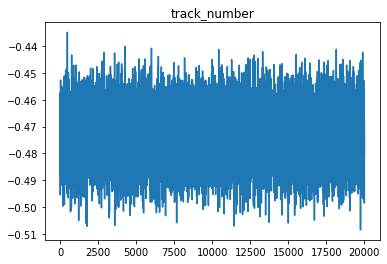

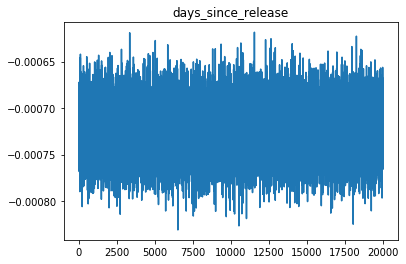

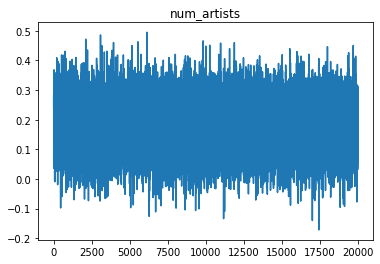

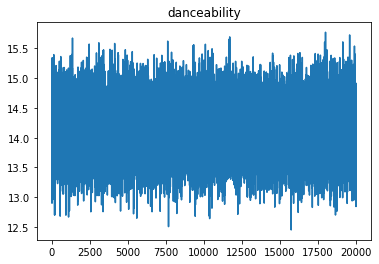

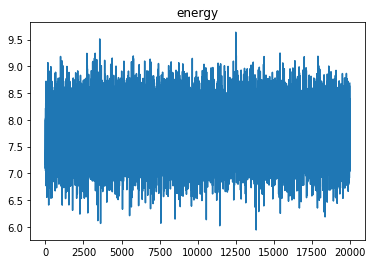

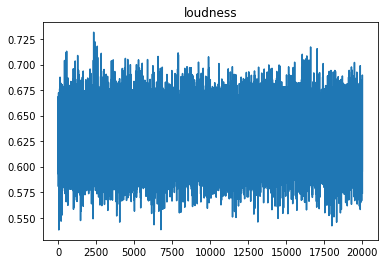

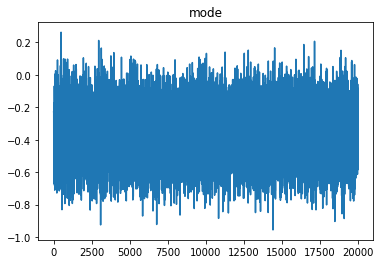

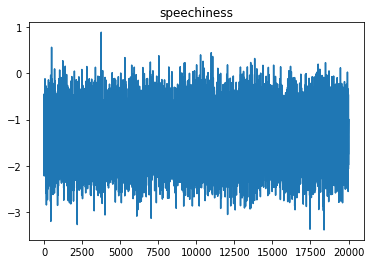

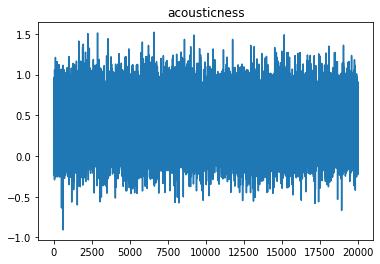

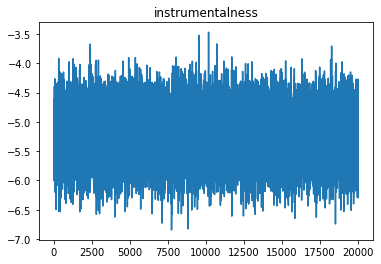

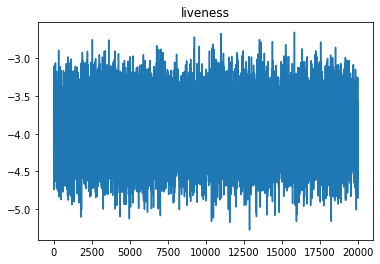

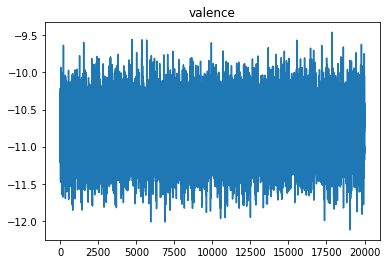

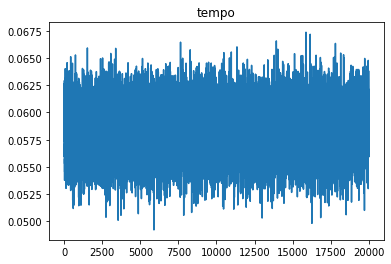

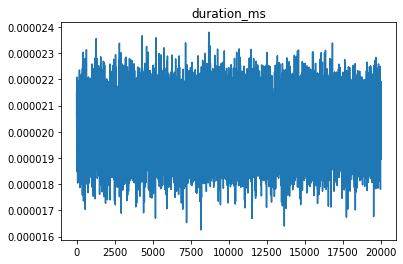

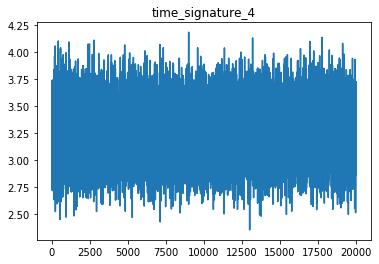

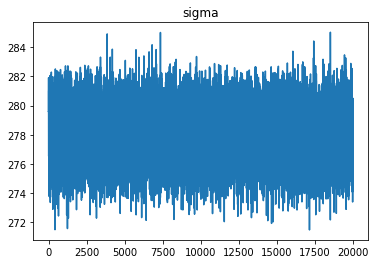

In [14]:
for i in range(X.shape[1]):
    plt.plot(betas[burnin:,i])
    plt.title(features[i])
    plt.show()
plt.plot(sigma[burnin:])
plt.title('sigma')
plt.show()

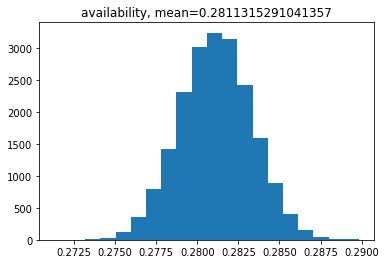

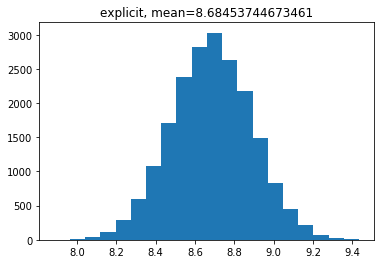

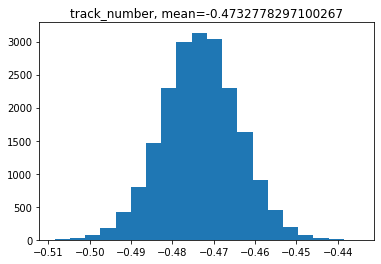

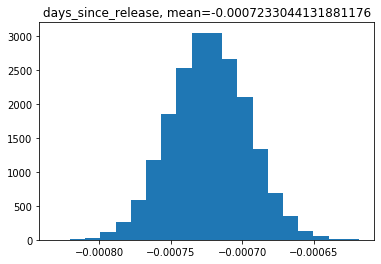

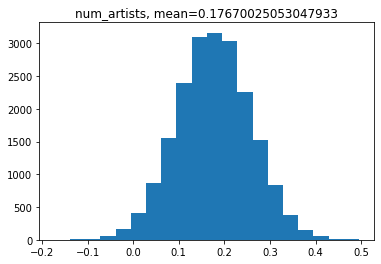

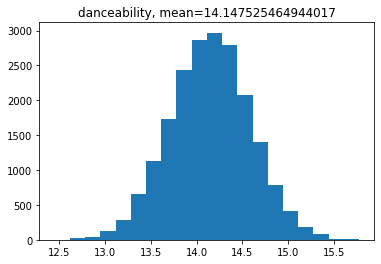

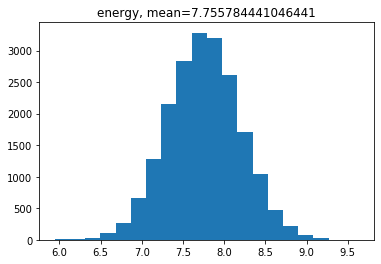

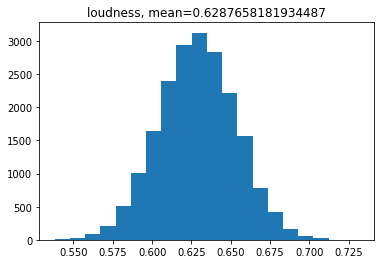

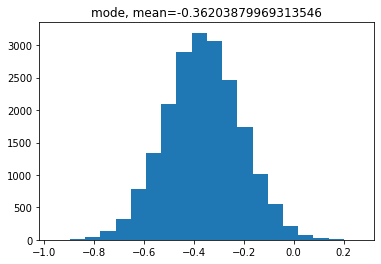

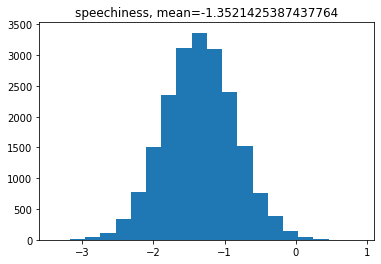

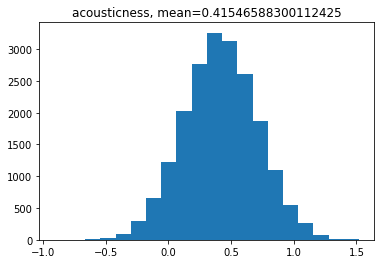

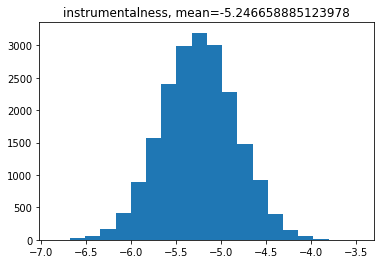

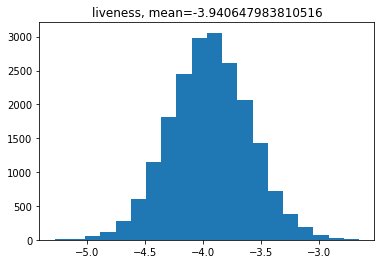

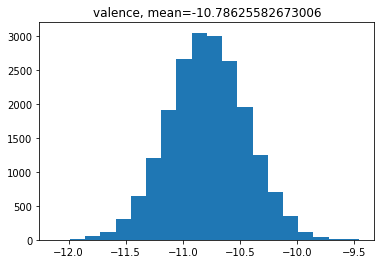

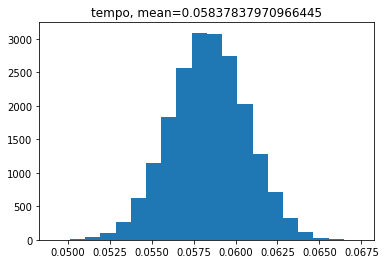

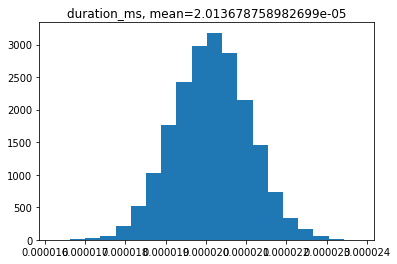

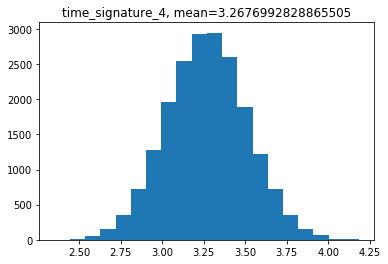

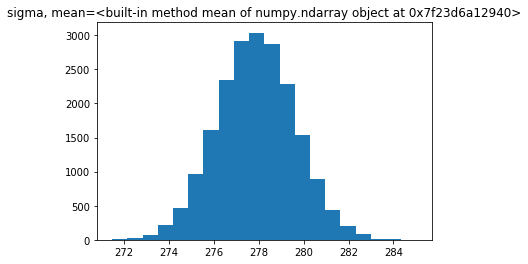

In [15]:
for i in range(X.shape[1]):
    plt.hist(betas[burnin:,i], bins=20)
    plt.title(f'{features[i]}, mean={betas[burnin:,i].mean()}')
    plt.show()
plt.hist(sigma[burnin:], bins=20)
plt.title(f'sigma, mean={sigma[burnin:].mean()}')
plt.show()